In [1]:
import smooth_component_analysis as sca
from importlib import reload
reload(sca)
import numpy as np
import pandas as pd
import get_db_data as gdd

from scipy.stats import zscore
import matplotlib.pyplot as plt

import seaborn as sns


In [2]:
sago = sca.savitzky_golay([1001, 1004, 1006, 1007, 1008, 1009, 1010, 1011, 1012, 1013,
                          1042, 1043, 1044, 1045, 1046, 1047, 1048, 1049, 1050, 1051],
                          21,11,2,3)

In [17]:
def temporal_agreement(sig1, sig2):
    if type(sig1)==tuple:
        sig1 = df[sig1]
    if type(sig2)==tuple:
        sig2 = df[sig2]
    zs1 = zscore(sig1)
    zs2 = zscore(sig2)
    n = zs1.shape[0]
    return zs1*zs2/n

In [21]:
group_sg = lambda g:  [a for a in df.columns if a[0]==g and a[1].startswith('Sg_')]

In [22]:
df = sago.get_aligned_signal_componets()

x range: 4.0 222.0


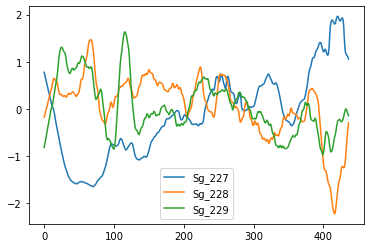

In [24]:
toplot = group_sg(1042)

for a in toplot:
    plt.plot(df[a])
    
plt.legend([x[1] for x in toplot])

array([[1.        , 0.69368654, 0.49181106],
       [0.69368654, 1.        , 0.52312382],
       [0.49181106, 0.52312382, 1.        ]])

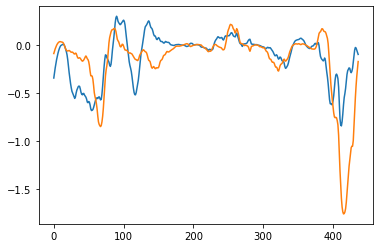

In [27]:
plt.plot(temporal_agreement((1042,'Sg_227'),(1042,'Sg_229'))*100)
plt.plot(temporal_agreement((1042,'Sg_227'),(1042,'Sg_228'))*100)

np.corrcoef([df[a]*z for a,z in zip(group_sg(1042),(-1,1,1))])

array([[1.        , 0.24455759, 0.20513025],
       [0.24455759, 1.        , 0.34362383],
       [0.20513025, 0.34362383, 1.        ]])

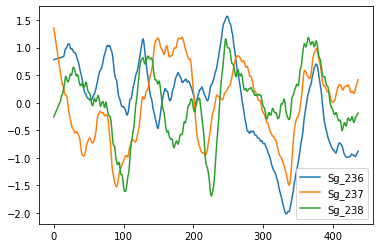

In [8]:
toplot = [a for a in df.columns if a[0]==1045 and a[1].startswith('Sg_')]

for a in toplot:
    plt.plot(df[a])
    
plt.legend([x[1] for x in toplot])

np.corrcoef([df[a] for a in toplot])

In [10]:
def temporal_agreement(sig1, sig2):
    zs1 = zscore(sig1)
    zs2 = zscore(sig2)
    n = zs1.shape[0]
    return zs1*zs2/n

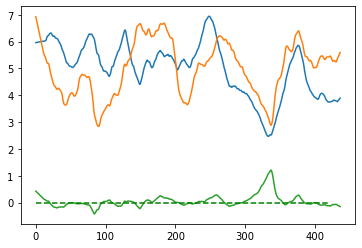

In [11]:
sig1 = (1045,'Sg_236')
sig2 = (1045, 'Sg_237')
zs236 = zscore(df[sig1])
zs237 = zscore(df[sig2])
plt.plot(zs236+5)
plt.plot(zs237+5)
plt.plot(temporal_agreement(zs236, zs237)*100)
plt.plot([0,420],[0,0],'g--')

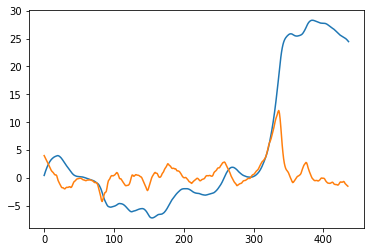

In [16]:
ta1045=np.cumsum(temporal_agreement(zs236, zs237)*100)
ta1045[350]-ta1045[300]
plt.plot(ta1045)
plt.plot(np.diff(ta1045)*10)

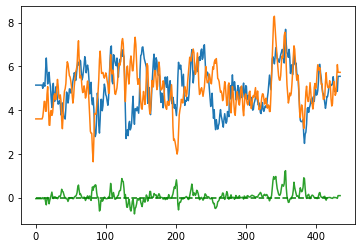

In [10]:
sig1 = (1045,'Sg_236')
sig2 = (1045, 'Sg_237')
zs236 = zscore(np.diff(df[sig1]))
zs237 = zscore(np.diff(df[sig2]))
plt.plot(zs236+5)
plt.plot(zs237+5)
plt.plot(temporal_agreement(zs236, zs237)*100)
plt.plot([0,420],[0,0],'g--')

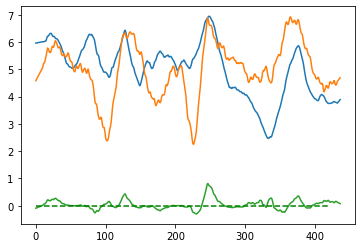

In [11]:
sig1 = (1045,'Sg_236')
sig2 = (1045, 'Sg_238')
zs236 = zscore(df[sig1])
zs238 = zscore(df[sig2])
plt.plot(zs236+5)
plt.plot(zs238+5)
plt.plot(temporal_agreement(zs236, zs238)*100)
plt.plot([0,420],[0,0],'g--')

In [12]:
sns.distplot(temporal_agreement(zs236, zs237))

ValueError: operands could not be broadcast together with shapes (437,) (436,) 

<AxesSubplot:>

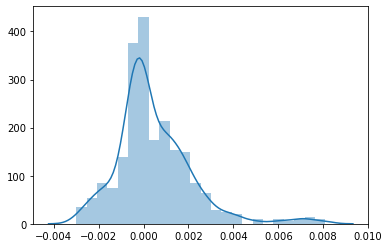

In [13]:
sns.distplot(temporal_agreement(zs236, zs238))

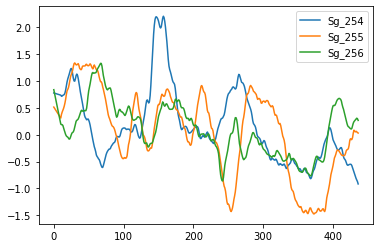

In [14]:
toplot = [a for a in df.columns if a[0]==1051 and a[1].startswith('Sg_')]

for a in toplot:
    plt.plot(df[a])
    
plt.legend([x[1] for x in toplot])

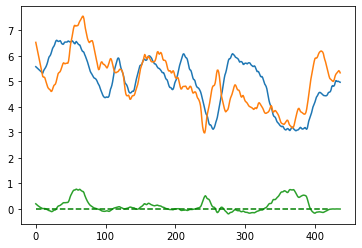

In [16]:
sig1 = (1051,'Sg_255')
sig2 = (1051, 'Sg_256')
zs255= zscore(df[sig1])
zs256 = zscore(df[sig2])
plt.plot(zs255+5)
plt.plot(zs256+5)
plt.plot(temporal_agreement(zs255, zs256)*100)
plt.plot([0,420],[0,0],'g--')

<AxesSubplot:>

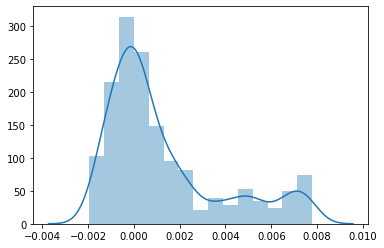

In [18]:
sns.distplot(temporal_agreement(zs255, zs256))

In [19]:
x = temporal_agreement(zs255, zs256)

sum(x[x<=0.002]),sum(x[x>0.002])

(-0.017661723232000538, 0.563628430969925)

In [21]:
sorted(x)[len(x)//2]

0.0002994137615752278

In [22]:
x.mean(), x.std()

(0.001249351733954061, 0.002526045191883591)

In [23]:
np.percentile(x,50)

0.0002994137615752278

In [43]:
#df.loc[1007]
df.xs(1007,axis=1, level=0, drop_level=False)

1007                                                              \
      Raw_119    Sg_119 resid_119   rms_119  rmso_119   Raw_120    Sg_120   
0   -0.335537 -0.806811  0.471274  0.286422  0.348585 -0.114682  0.260161   
1   -0.280522 -0.729002  0.448480  0.316879  0.373048  0.107084  0.266012   
2   -0.391380 -0.651192  0.259812  0.359143  0.409316  0.262073  0.271864   
3   -0.642466 -0.573382 -0.069084  0.384527  0.428705  0.396452  0.277715   
4   -0.640397 -0.495572 -0.144825  0.399875  0.438058  0.476890  0.283567   
..        ...       ...       ...       ...       ...       ...       ...   
432  0.713894  0.737118 -0.023224  1.181243  1.124449  0.969180  0.817971   
433  0.558913  0.847614 -0.288701  1.102831  1.037524  0.969063  0.883410   
434  0.855776  0.958110 -0.102334  0.958220  0.884400  0.739877  0.948849   
435  1.882319  1.068607  0.813712  0.776509  0.694175  0.507158  1.014287   
436  2.513135  1.179103  1.334032  0.664268  0.573420  0.735284  1.079726   

                                                                           \
    resid_120   rms_120  rmso_120   Raw_121    Sg_121 resid_121   rms_121   
0   -0.374843  0.184958  0.158844  0.726470  1.731303 -1.004833  0.460935   
1   -0.158928  0.175449  0.148747  1.113961  1.693434 -0.579472  0.460573   
2   -0.009791  0.165484  0.138195  1.398818  1.655564 -0.256746  0.472895   
3    0.118736  0.169121  0.141245  1.669335  1.617695  0.051640  0.497280   
4    0.193323  0.169974  0.141511  1.896728  1.579825  0.316903  0.504037   
..        ...       ...       ...       ...       ...       ...       ...   
432  0.151209  0.348717  0.266612  0.440897 -0.156521  0.597418  0.404392   
433  0.085653  0.322505  0.233831  0.288891 -0.215029  0.503920  0.402427   
434 -0.208972  0.307483  0.212240  0.243105 -0.273537  0.516642  0.405096   
435 -0.507129  0.314256  0.212445  0.166488 -0.332045  0.498533  0.420787   
436 -0.344442  0.311935  0.203555  0.060371 -0.390553  0.450924  0.459118   

               
     rmso_121  
0    0.443025  
1    0.443054  
2    0.455768  
3    0.480544  
4    0.487693  
..        ...  
432  0.406011  
433  0.404652  
434  0.407926  
435  0.424222  
436  0.463159  

[437 rows x 15 columns]

In [83]:
def temporal_sync_plot(group,series_type):
    colnames = [a for a in df.columns if a[0]==group and a[1].startswith(series_type)]
    signals = [zscore(df[a]) for a in colnames]
    print([len(s) for s in signals])
    plt.figure(figsize=(8,6))
    for sig in signals:
        plt.plot(sig+4)
    plt.legend([s[1] for s in colnames])
    n = len(signals[0])
    plt.plot(temporal_agreement(signals[0], signals[1])*100)
    plt.plot([0,n],[0,0],'r--')
    plt.plot(temporal_agreement(signals[0], signals[2])*100-1)
    plt.plot([0,n],[-1,-1],'m--')
    plt.plot(temporal_agreement(signals[1], signals[2])*100-2)
    plt.plot([0,n],[-2,-2],'--',color=[0.6350, 0.0780, 0.1840])
        

[437, 437, 437]


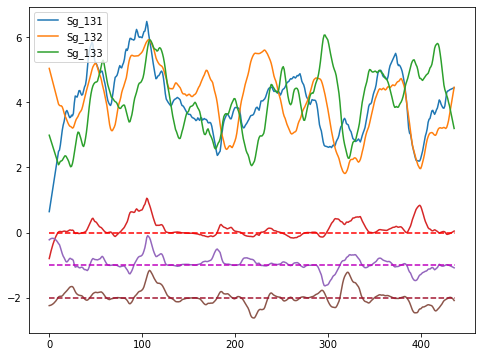

In [84]:
temporal_sync_plot(1011,'Sg_')

[437, 437, 437]


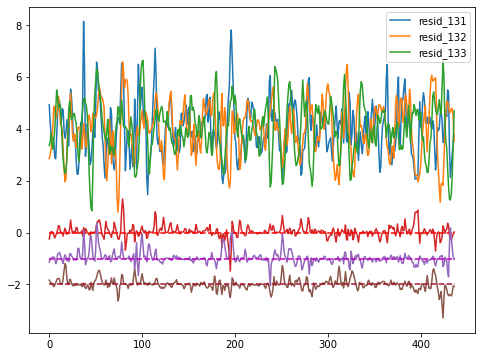

In [85]:
temporal_sync_plot(1011,'resid_')

[437, 437, 437]


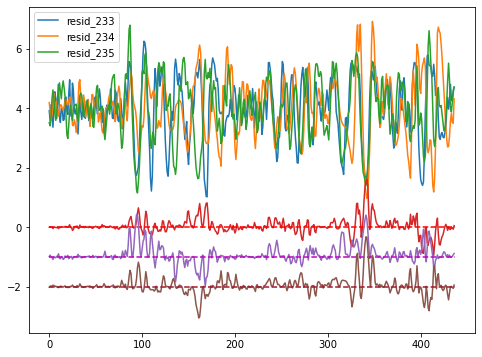

In [86]:
temporal_sync_plot(1044,'resid_')

[437, 437, 437]


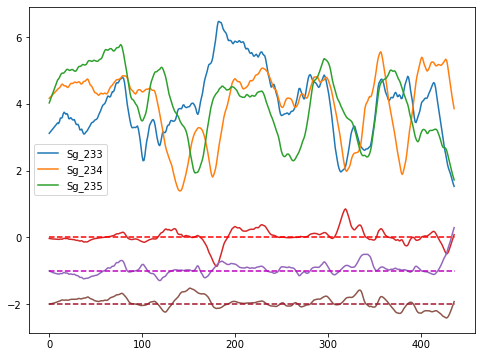

In [87]:
temporal_sync_plot(1044,'Sg_')

In [ ]:
def windowed_correlation(signals, window_size):
    signals = [local_features(s, windos_size) for s in signals]
    zscore()

In [95]:
r = np.random.rand(10,4)
print(r,end='\n\n\n')
np.diag(r,-2)
#print(r.diagonal(-2))

[[2.85697549e-02 8.57771992e-03 3.84644345e-01 2.47479694e-02]
 [6.89994888e-01 8.18697509e-04 6.95925973e-01 4.10565803e-01]
 [6.91957614e-01 1.82382391e-01 7.74676320e-02 1.65664335e-02]
 [3.84135553e-01 7.84578322e-02 1.53790973e-01 1.13723365e-01]
 [8.61863903e-01 7.52956853e-01 5.34706767e-01 8.74020670e-01]
 [6.84914127e-01 6.92783636e-01 5.17095712e-01 2.75874690e-01]
 [1.01991881e-01 1.60156761e-01 7.45704131e-01 6.74215945e-01]
 [2.06264709e-01 7.58822276e-01 9.97646278e-01 3.11437797e-01]
 [5.10697342e-01 8.88947447e-01 6.86741987e-01 3.06140850e-01]
 [4.89218856e-01 7.79640324e-01 6.48401097e-01 8.23608127e-01]]




array([0.69195761, 0.07845783, 0.53470677, 0.27587469])

In [102]:
def local_features(signal, window_size):
    n = signal.shape[0]
    ret = np.zeros((n,window_size))
    for i in range(window_size):
        ret[i:,i] = signal[:(-i if i else None)]
    return ret[:,::-1]

In [107]:
b = local_features(np.random.rand(20),6)

In [108]:
b

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.63274198],
       [0.        , 0.        , 0.        , 0.        , 0.63274198,
        0.67115383],
       [0.        , 0.        , 0.        , 0.63274198, 0.67115383,
        0.54674548],
       [0.        , 0.        , 0.63274198, 0.67115383, 0.54674548,
        0.15174138],
       [0.        , 0.63274198, 0.67115383, 0.54674548, 0.15174138,
        0.84466658],
       [0.63274198, 0.67115383, 0.54674548, 0.15174138, 0.84466658,
        0.98405578],
       [0.67115383, 0.54674548, 0.15174138, 0.84466658, 0.98405578,
        0.17775054],
       [0.54674548, 0.15174138, 0.84466658, 0.98405578, 0.17775054,
        0.02670878],
       [0.15174138, 0.84466658, 0.98405578, 0.17775054, 0.02670878,
        0.71064393],
       [0.84466658, 0.98405578, 0.17775054, 0.02670878, 0.71064393,
        0.9272368 ],
       [0.98405578, 0.17775054, 0.02670878, 0.71064393, 0.9272368 ,
        0.54430533],
       [0.17775054, 0

In [113]:
b1 = zscore(b,axis=1)

In [115]:
b1.std(axis=1)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1.])

In [126]:
b= local_features(df[(1044,'Sg_233')],80)

In [117]:
b.shape

(437, 40)

In [118]:
from sklearn.decomposition import PCA

In [127]:
P = PCA()
P.fit_transform(b)

array([[-4.60977099e-01, -9.10163415e-02,  1.42513786e-01, ...,
        -1.16602465e-02,  8.31573173e-03,  1.00209677e-02],
       [-4.88406346e-01, -1.56691094e-01,  2.21432978e-01, ...,
         2.69535081e-02, -1.31186714e-02, -2.64582356e-02],
       [-5.16472366e-01, -2.20744561e-01,  2.97895947e-01, ...,
        -3.12523060e-02,  1.79061391e-03,  3.78028407e-02],
       ...,
       [-1.20111961e-01, -2.41034886e+00,  1.50600041e+00, ...,
         6.15210331e-04, -2.99705197e-03, -3.15101343e-03],
       [-2.72532460e-01, -2.58472753e+00,  1.73952828e+00, ...,
        -4.67692853e-04,  1.12354124e-03,  4.48244625e-03],
       [-4.32773826e-01, -2.76057492e+00,  1.97371845e+00, ...,
        -6.82520433e-04,  1.56032946e-03, -3.55680675e-03]])

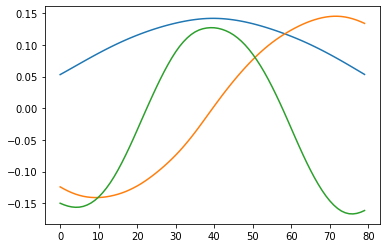

In [128]:
plt.plot(P.components_[0,:])
plt.plot(P.components_[1,:])
plt.plot(P.components_[2,:])

In [55]:
sg = np.vstack([df[c] for c in df.columns if c[1].startswith("Sg_")])
sgz = np.vstack([zscore(df[c]) for c in df.columns if c[1].startswith("Sg_")])

In [56]:
sg.shape, sgz.shape

((60, 437), (60, 437))

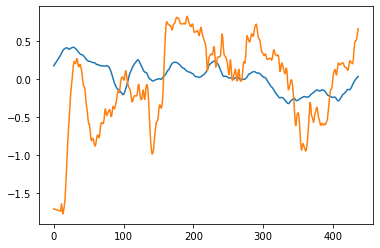

In [57]:
plt.plot(sg.mean(axis=0))
#plt.plot(a.mean(axis=0)+a.std(axis=0)/8)
plt.plot(sg[4,:])

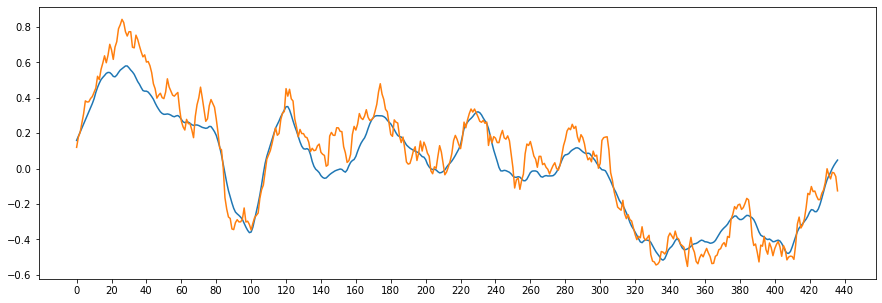

In [69]:
plt.figure(figsize=(15,5))
plt.plot(sgz.mean(axis=0))
#plt.plot(sgz.std(axis=0))
#plt.plot(sgz[:30,:].mean(axis=0))
#plt.plot(sgz[30:,:].mean(axis=0))
plt.plot(np.percentile(sgz,50,axis=0))
plt.xticks(np.arange(0,460,20));
#plt.plot(b[4,:])

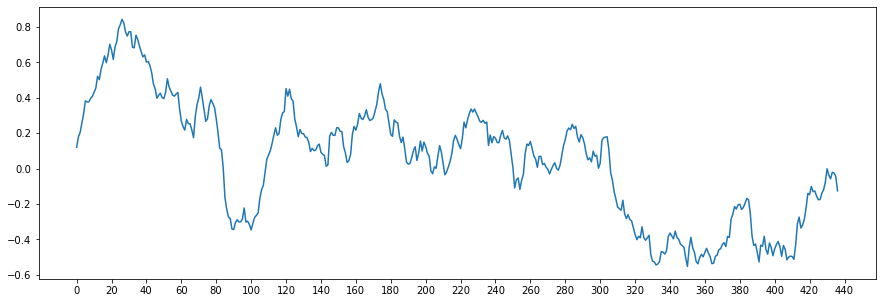

In [68]:
plt.figure(figsize=(15,5))
plt.plot(np.percentile(sgz,50,axis=0))
#plt.plot(sgz.std(axis=0))
#plt.plot(sgz[:30,:].percen(axis=0))
#plt.plot(sgz[30:,:].mean(axis=0))

plt.xticks(np.arange(0,460,20));
#plt.plot(b[4,:])


In [59]:
np.sort(
     sgz @ zscore(sgz.mean(axis=0))/437
)

array([-0.56117393, -0.37406518, -0.37228238, -0.31743842, -0.14368398,
       -0.13571708, -0.13443367, -0.05802121, -0.05353815, -0.05090413,
       -0.04695545, -0.03587542, -0.03360395,  0.00983552,  0.0241402 ,
        0.07380601,  0.07979752,  0.09686797,  0.10341158,  0.13346407,
        0.14094937,  0.17270392,  0.17747933,  0.203049  ,  0.21066803,
        0.23663445,  0.23856471,  0.30549177,  0.31370922,  0.31399812,
        0.35716238,  0.37135418,  0.39189708,  0.4278619 ,  0.43136974,
        0.43148622,  0.43938414,  0.43974523,  0.44159025,  0.45527581,
        0.46740292,  0.47611181,  0.50100631,  0.50139527,  0.50605413,
        0.53186375,  0.54213246,  0.5537873 ,  0.58505616,  0.61706933,
        0.64295238,  0.64598386,  0.65562893,  0.66426138,  0.71123796,
        0.71922055,  0.72153659,  0.73455128,  0.75374975,  0.77017623])

-0.3587348764325015

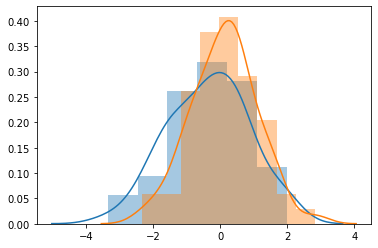

In [64]:
sns.distplot(sgz[:,100])
sns.distplot(sgz[:,130])
np.mean(sgz[:,100])

In [ ]:
c = np.vstack([zscore(df[c]) for c in df.columns if c[1].startswith("raw_")])